In [1]:
import os
import numpy as np
import pprint
from fastestimator.summary.logs import parse_log_file
import matplotlib.pyplot as plt

/home/yunchan/anaconda3/envs/tf2.3/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [16]:
def plot_metric_diff(ylim=None):
    acc = {}
    for init_lr in ["0.01", "0.001", "0.0001"]:
        acc[init_lr] = []
        for exp in ["take_accuracy", \
                    "take_mcc", \
                    "take_loss", \
                    "take_calibration_error", \
                    "take_wacc"]:
            stat = []
            for model_run in range(1,6):
                for run in range(7):
                    summary = parse_log_file(f"../../../logs/supplementary/metric_study/{exp}/run_{model_run}/image_classification/{init_lr}_{run}.txt", ".txt")
                    max_acc = np.max([x for x in summary.history["eval"]["accuracy"].values()])
                    stat.append(max_acc)
            acc[init_lr].append(stat)
        
        # final ARC model (ARC 4)
        if init_lr == "1.0":
            init_lr_fix = "1"
        else:
            init_lr_fix = init_lr.replace(".", "")

        stat = []
        for run in range(5):
            summary = parse_log_file(f"../../../logs/normal_comparison/image_classification/{init_lr_fix}_lr-controller-weighted-acc_{run}.txt", ".txt")
            max_acc = np.max([x for x in summary.history["eval"]["accuracy"].values()])
            stat.append(max_acc)
        acc[init_lr].append(stat)
            
#     if not ylim:
#         max_list, min_list = [], []
#         for _, val in acc.items():
#             max_list.append(np.max(val))
#             min_list.append(np.min(val))

#         max_val = max(max_list)
#         min_val = min(min_list)

#         top_limit = (max_val + min_val)/2 + (max_val - min_val)/2*1.05
#         bot_limit = (max_val + min_val)/2 - (max_val - min_val)/2*1.05
#         ylim = [bot_limit, top_limit]
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    for i, key in enumerate(acc.keys()):
        
        bplot1 = axs[i].boxplot(
            acc[key],
            vert=True,  # vertical box aligmnent
            patch_artist=True)  # fill with color

        # set ax title
        axs[i].set_title(f"init_lr = {key}")
        axs[i].set_ylim(ylim)

        # adding horizontal grid lines
        axs[i].yaxis.grid(True)
        axs[i].set_xticks([y+1 for y in range(6)])
        axs[i].set_xticklabels(["accuracy", "mcc", "loss", "cali", "wacc", "proxy"])
    plt.savefig("../../../results/supplementary/metric_study.jpeg", dpi=300, transparent=True)

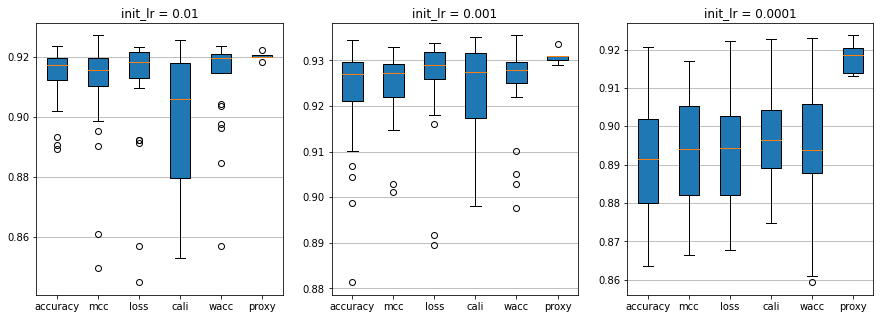

In [17]:
plot_metric_diff()